In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [29]:
df = pd.read_csv("Cancer_Data.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df = df.drop('Unnamed: 32', axis=1)



In [32]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

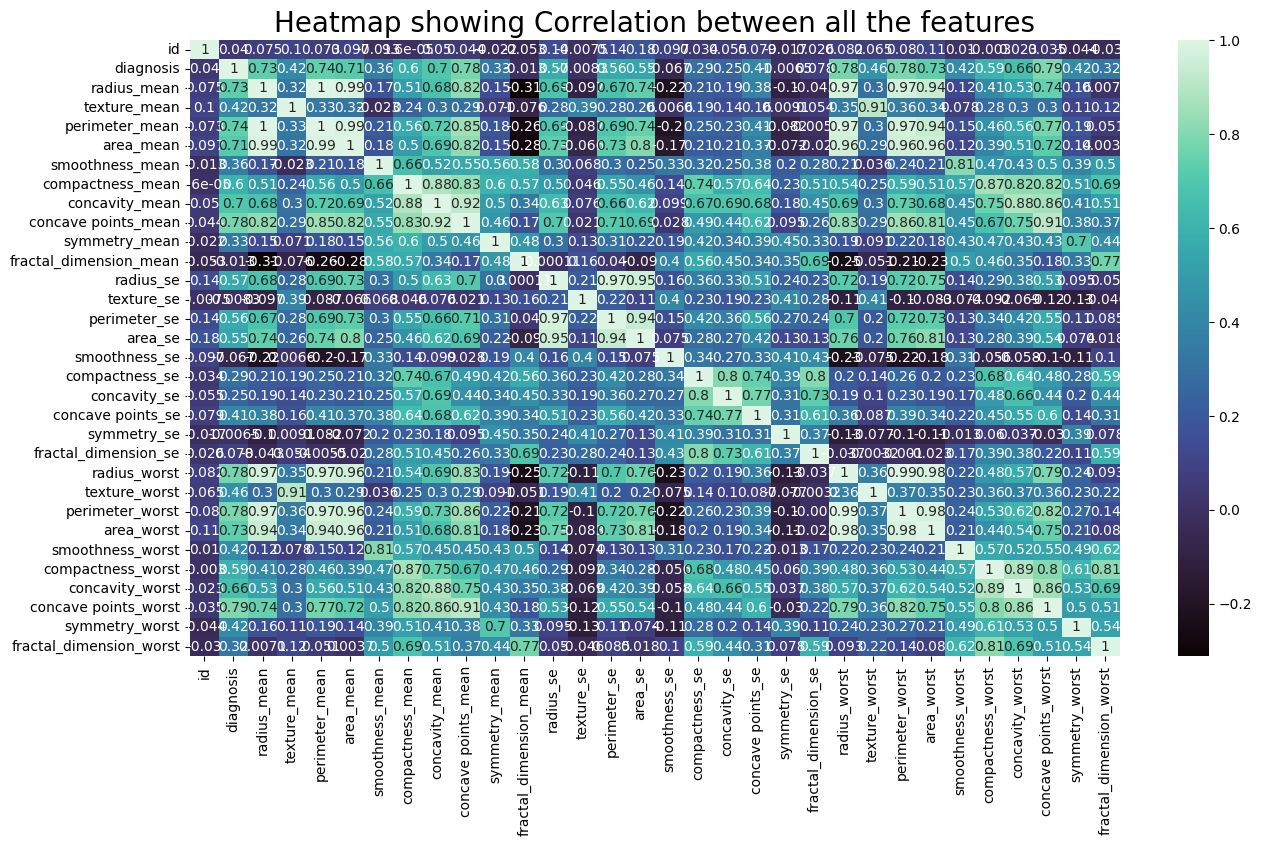

In [33]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

In [34]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('diagnosis',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.drop('diagnosis', axis=1).columns)

In [35]:
x = df_scaled
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
def run_svm(kernel, C):
    clf = SVC(kernel=kernel, C=C)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    # Model accuracy
    print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

    # Classification metrics
    print(classification_report(y_test, y_pred))

Kernel: linear, C: 1
Model accuracy : 0.956
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Kernel: linear, C: 50
Model accuracy : 0.930
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        71
           1       0.87      0.95      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Kernel: linear, C: 500
Model accuracy : 0.939
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        71
           1       0.88      0.98      0.92        43

    accuracy                           0.94    

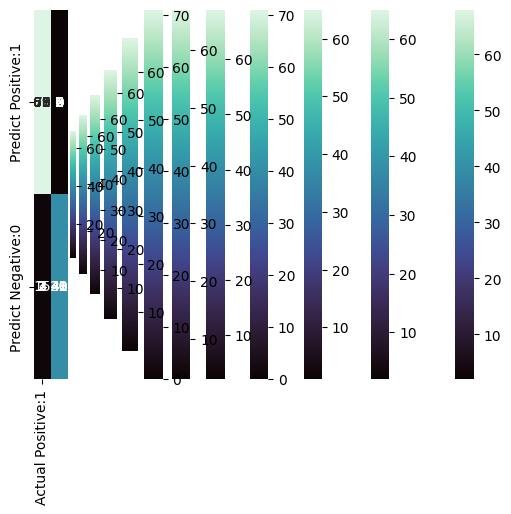

In [37]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [1, 50, 500]:
        print(f'Kernel: {kernel}, C: {C}')
        run_svm(kernel, C)

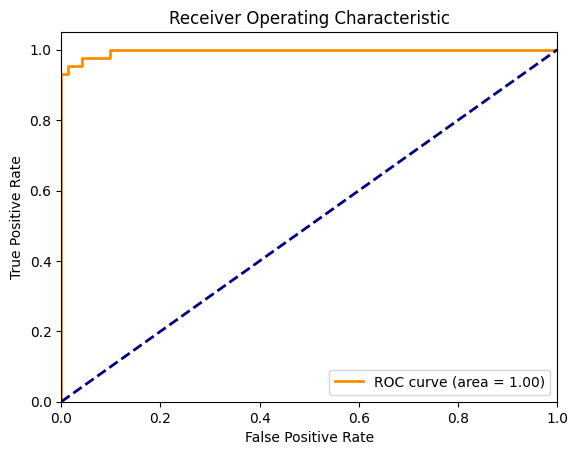

In [38]:
classifier = SVC(kernel='linear', probability=True)

classifier.fit(x_train, y_train)

y_score = classifier.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()